In [1]:
import csv
import numpy as np
import ROOT as rt
from glob import glob
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'ROOT'

 FCN=86.5132 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=1.22222e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.72325e+01   6.24334e-01   3.28884e-03   1.54492e-03
   2  Mean        -1.08357e+01   5.04019e-02   2.09048e-04   8.51310e-03
   3  Sigma        8.80069e-01   3.99446e-02   6.51065e-05   3.68194e-02
                               ERR DEF= 0.5
 FCN=137.345 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=5.55528e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.40731e+01   9.79327e-01  -2.33007e-03  -2.14562e-04
   2  Mean        -1.00917e+01   3.12582e-02  -2.

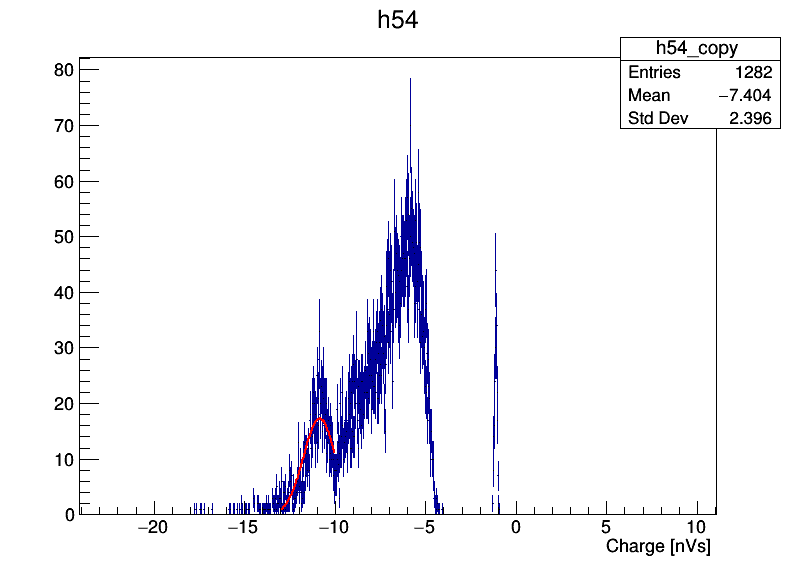

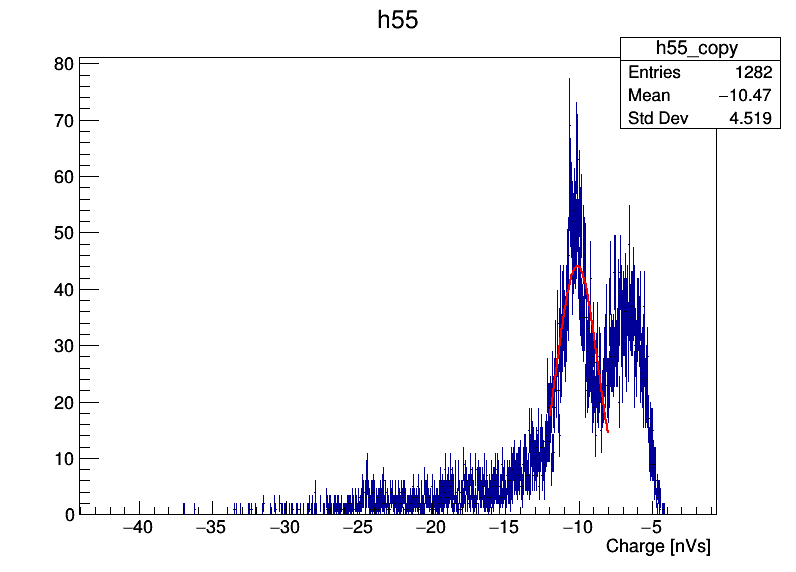

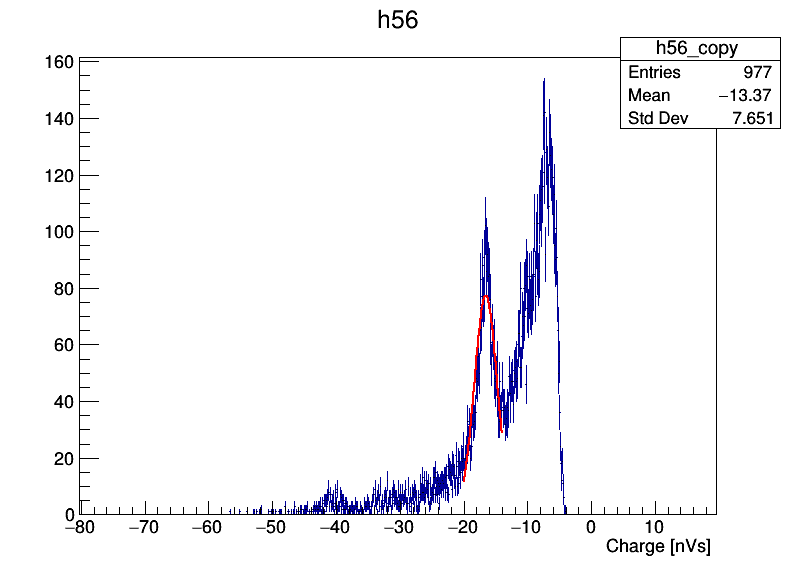

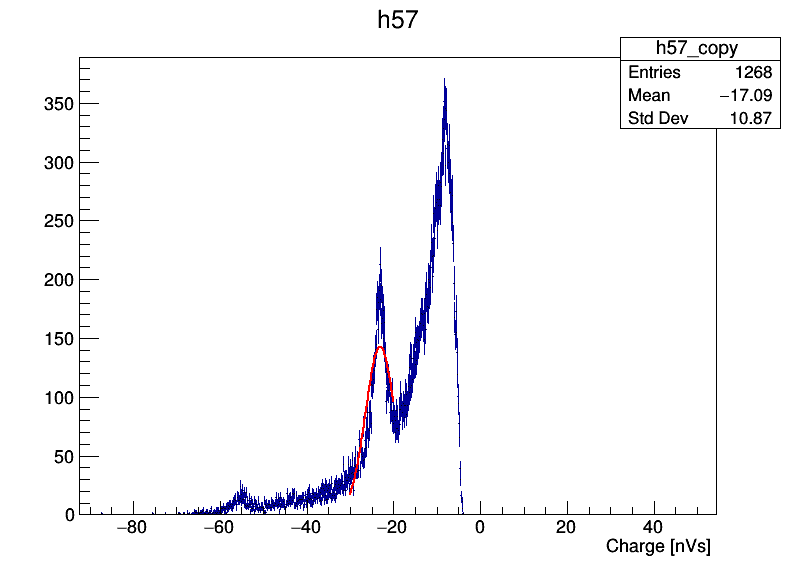

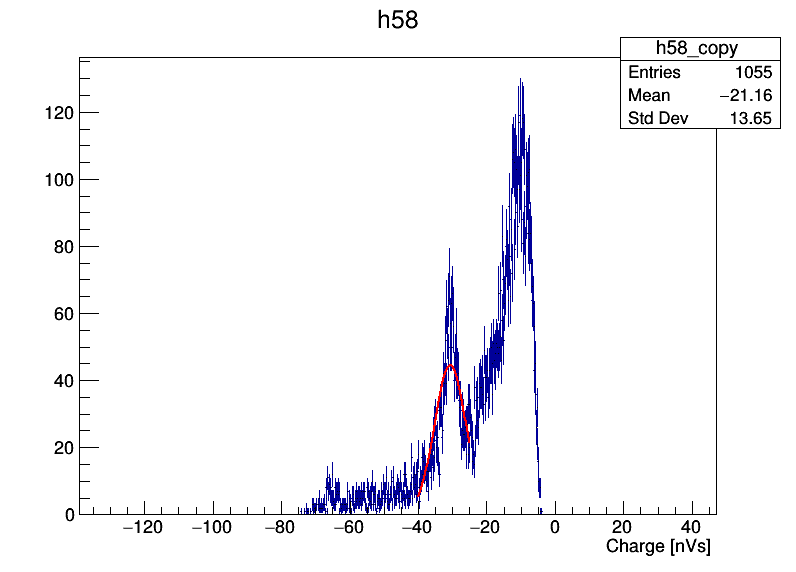

In [2]:
V = [54, 55, 56, 57, 58]
Ch = []
donotdelete = []

limits = {54:[-13, -10], 55:[-12, -8], 56:[-20, -14], 57:[-30, -20], 58:[-40, -25]}

for v in V:
    f = open('data/ScopeHistos/Na22_SergeyBoard_NoClipping_TeflonWrapping_3x3_{}.csv'.format(v))
    content = csv.reader(f)

    x = []
    y = []
    for r in content:
        x.append(1e9*float(r[0]))
        y.append(float(r[1]))

    h = rt.TH1F('h' + str(v), 'h' + str(v), int(len(x)), x[0], x[-1])
    h.SetXTitle('Charge [nVs]')
    for i in range(len(x)):
        h.SetBinContent(i+1, y[i])

    i_50 = h.Fill(-50, 0)
    i_10 = h.Fill(-10, 0)

    h.GetXaxis().SetRange(i_50, i_10)
    i_max = h.GetMaximumBin()
    h.GetXaxis().SetRange(1, len(x))

    c = rt.TCanvas('c' + str(v), 'c' + str(v), 800, 600)
    r = h.Fit('gaus', 'LRS', '', limits[v][0], limits[v][1])
    
    Ch.append(-r.Get().Parameter(1))

    h.DrawCopy()
    c.Draw()
    donotdelete.append(c)

In [9]:
Ch

[10.835701128253595,
 10.09171787870263,
 16.524519068480515,
 23.03090953468168,
 30.567956801434033]

In [10]:
V

[54, 55, 56, 57, 58]

In [5]:
gain = [[54., 11], ]

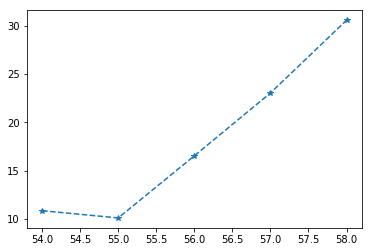

In [7]:
plt.plot(V, Ch, '*--')

In [8]:
np.polyfit(V[1:], Ch[1:], 1)

array([   6.79351072, -363.77958005])